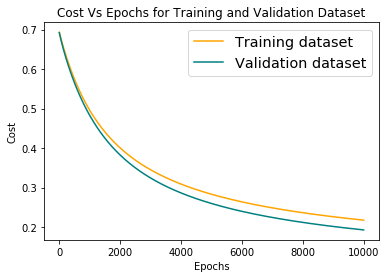

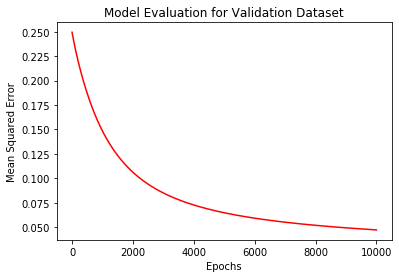

Weights [[ 0.72259562]
 [ 0.25749189]
 [ 0.80307197]
 [ 0.90512939]
 [-0.4065697 ]
 [ 0.71127586]
 [ 1.45915997]
 [ 1.7399442 ]
 [-0.46506171]
 [-0.88738442]
 [ 0.64869035]
 [-0.5278839 ]
 [ 0.58079415]
 [ 0.55245105]
 [-0.58046963]
 [-0.09661534]
 [-0.0898104 ]
 [-0.0475908 ]
 [-0.58387329]
 [-0.32298828]
 [ 1.2023678 ]
 [ 0.51039022]
 [ 1.20259463]
 [ 1.10057528]
 [ 0.12827255]
 [ 0.86653305]
 [ 1.16810775]
 [ 1.84093613]
 [ 0.22741431]
 [ 0.1480636 ]]
Bias -3.8217272506196127
Accuracy Score: 0.9649122807017544
Confusion Matrix:
 [[34  0]
 [ 2 21]]
Precision: 1.0
Recall: 0.9444444444444444
Accuracy: 0.9649122807017544
Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       1.00      0.91      0.95        23

    accuracy                           0.96        57
   macro avg       0.97      0.96      0.96        57
weighted avg       0.97      0.96      0.96        57



In [2]:
# Import pandas 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def normalize(df):
    result = df.copy()
    for column in df.columns:
        max_value = df[column].max()
        min_value = df[column].min()
        result[column] = (df[column] - min_value) / (max_value - min_value)
    return result


def sigmoid(z):
 return 1 / (1 + np.exp(-z))

def getTotalCost(x, y, p):
   return -np.sum(np.multiply(np.log(p), y) + np.multiply((1 - y), np.log(1 - p)))/x.shape[1]

def logisticRegression(x, y, w, b):
    m = x.shape[1]
    z = np.dot(w.T, x) + b
    p = sigmoid(z)
    cost = getTotalCost(x, y, p)
    #gradient descent
    dz = p-y
    dw = (1 / m) * np.dot(x, dz.T)
    db = (1 / m) * np.sum(dz)
    #updating Weight and bias
    w = w - learningrate * dw
    b = b - learningrate * db
    return cost, w, b, p

# reading csv file  
pf = pd.read_csv("wdbc.csv")

#dropping first column and label
x=pf.iloc[:,2:] 

#replacing labels
y = pf['label']
y = y.map({'B': 0, 'M': 1})

#normalizing dataset
x = normalize(x)

# partitioning dataset into train, validate and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=1)


# Taking transpose on X and Y
X, Y = x_train.T, y_train.values.reshape(1, y_train.shape[0])
x_val, y_val = x_val.T, y_val.values.reshape(1, y_val.shape[0])

# Initializing hyperparameters
epochs = 10000
learningrate = 0.01
w = np.random.randn(X.shape[0], 1)*0.01
b = 0

training_cost = []
mse_list = []
validation_cost = []
for epoch in range(epochs):
    #training the model with training dataset
    cost, w, b, p  = logisticRegression(X, Y, w, b)
    training_cost.append(np.squeeze(cost))

    #evaluating the model with validation dataset   
    z = np.dot(w.T, x_val) + b
    p = sigmoid(z)
    cost = getTotalCost(x_val, y_val, p)
    validation_cost.append(np.squeeze(cost)) 
    
    #model evaluating metrics by mean squared error
    mse = np.square(np.subtract(y_val,p)).mean()
    mse_list.append(mse)

#plotting the graph of Cost vs Epochs for training and validation dataset
plt.figure(1)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Cost Vs Epochs for Training and Validation Dataset')
plt.plot(training_cost,label='Training dataset', color='orange')
plt.plot(validation_cost, label='Validation dataset', color='teal')
plt.legend(loc='upper right', fontsize='x-large')


#plotting the graph of Mean Squared Error vs Epochs for validation dataset - Evaluating Metrics
plt.figure(2)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epochs')
plt.title('Model Evaluation for Validation Dataset')
plt.plot(mse_list, color='red')
plt.show()

# Evaluating the model with test data
print('Weights',w)
print('Bias',b)
z = np.dot(x_test, w) + b
p = sigmoid(z)
output = []

#convert the predicted output to class 0 or class 1
for i in range(len(p)):
    if(p[i] <= 0.5):
        output.append(0)
    else:
        output.append(1)

#computing prediction, accuracy, recall using Confusion Matrix
actual = y_test.tolist()
predicted = output

print('Accuracy Score:', accuracy_score(actual, predicted))
confusion_matrix = confusion_matrix(actual, predicted)
print('Confusion Matrix:\n', confusion_matrix)

tp = confusion_matrix[0][0]
fp = confusion_matrix[0][1]
fn = confusion_matrix[1][0]
tn = confusion_matrix[1][1]

precision = tp/(tp+fp)
print('Precision:', precision)

recall = tp/(tp+fn)
print('Recall:', recall)

accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy:', accuracy)

print('Report:')
print(classification_report(actual, predicted))
